# 🛒 Unsupervised Learning Projects

This repository contains three distinct unsupervised learning projects using different datasets and techniques:

1. **Clustering Algorithms (K-Means, Hierarchical, DBSCAN)** on the **Mall Customers** dataset.
2. **Dimensionality Reduction (PCA, t-SNE)** on the **Wine** dataset.
3. **Association Rule Mining (Apriori)** on the **Groceries** dataset.

Each section applies comprehensive preprocessing and visualization techniques.

---

## 1. Clustering Analysis with Mall Customers Dataset

**Dataset:** Mall Customers  
**Objective:** Group customers based on their Age, Annual Income, and Spending Score.

### 1.1 Data Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Load Mall Customers dataset
mall_df = pd.read_csv("/kaggle/input/mall-customers-dataset/Mall_Customers.csv")

# Rename and encode categorical variables
mall_df.rename(columns={'Genre': 'Gender'}, inplace=True)
le = LabelEncoder()
mall_df['Gender'] = le.fit_transform(mall_df['Gender'])

# Select features and scale them
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
mall_scaled = scaler.fit_transform(mall_df[features])

### 1.2 Clustering Algorithms

#### A. K-Means Clustering

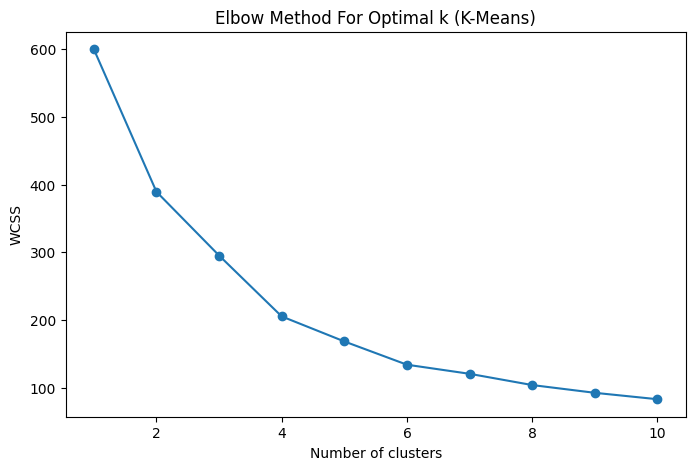

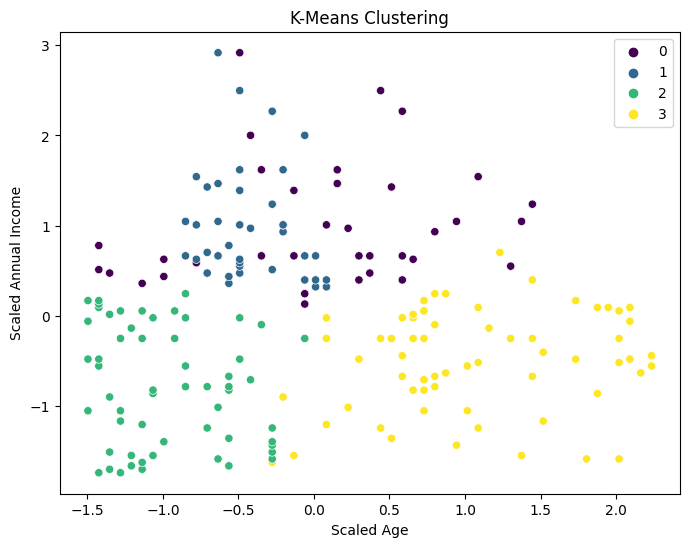

In [2]:
from sklearn.cluster import KMeans

# Determine optimal clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mall_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k (K-Means)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-Means with optimal clusters (example: k=5)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(mall_scaled)

# 2D Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=mall_scaled[:,0], y=mall_scaled[:,1], hue=kmeans_clusters, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Annual Income')
plt.show()


#### B. Hierarchical Clustering

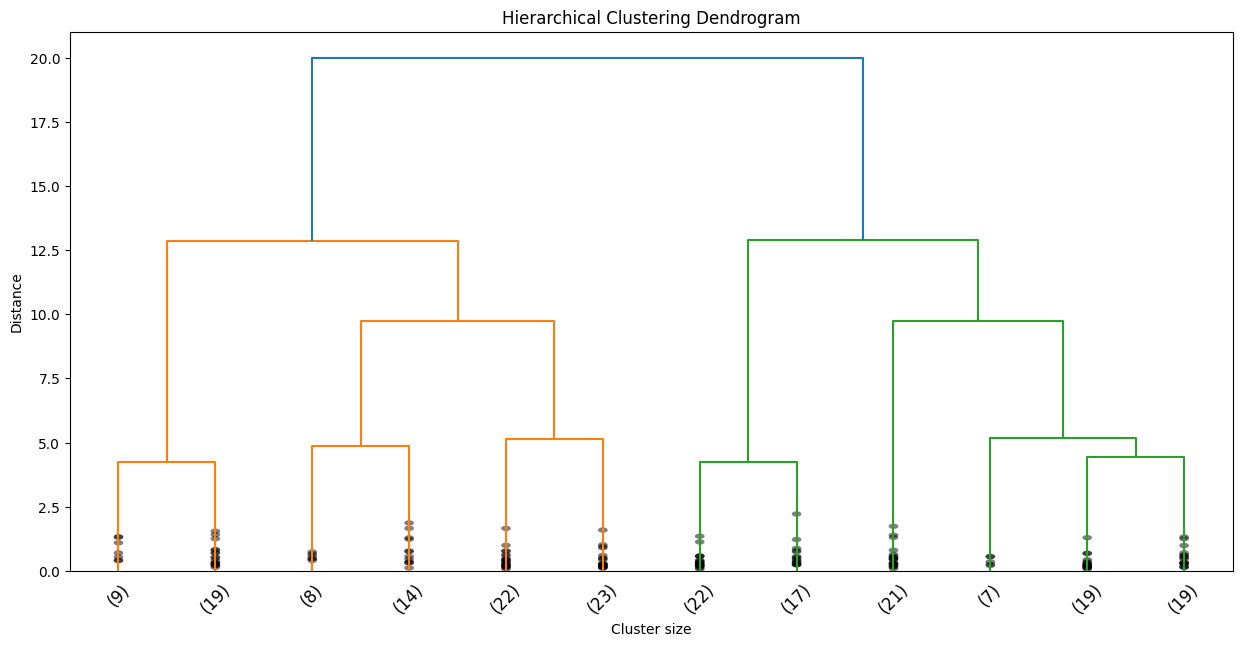

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage

# For large datasets, using full data might be heavy. Here, we use mall_scaled as it is small.
Z = linkage(mall_scaled, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()


#### C. DBSCAN Clustering

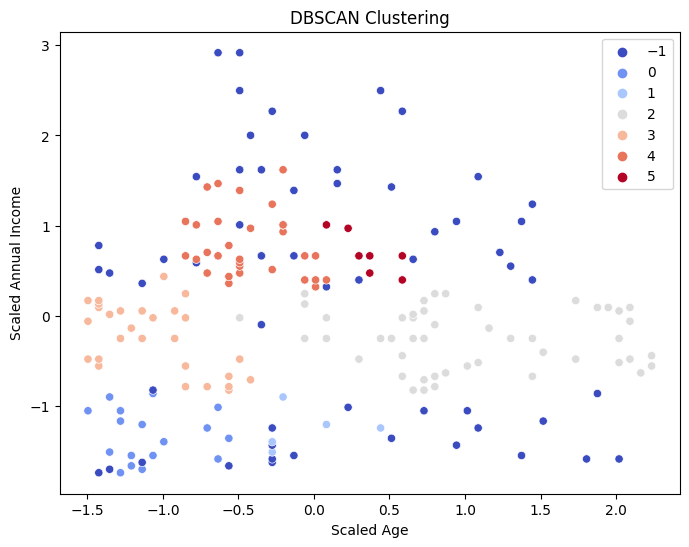

In [4]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(mall_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=mall_scaled[:,0], y=mall_scaled[:,1], hue=dbscan_clusters, palette='coolwarm')
plt.title('DBSCAN Clustering')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Annual Income')
plt.show()


2\. Dimensionality Reduction with Wine Dataset
----------------------------------------------

**Dataset:** Wine Dataset (UCI)**Objective:** Reduce the dimensionality of the Wine dataset and visualize clusters or data structure using PCA and t-SNE.

### 2.1 Data Loading and Preprocessing

In [5]:
# Load Wine dataset from UCI (or via sklearn)
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)
wine_df = wine.frame

# Inspect data
print("Wine dataset shape:", wine_df.shape)
print(wine_df.head())

# Scale features
wine_features = wine_df.drop(columns=['target'])
scaler_wine = StandardScaler()
wine_scaled = scaler_wine.fit_transform(wine_features)


Wine dataset shape: (178, 14)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines 

### 2.2 Dimensionality Reduction

#### A. PCA Visualization

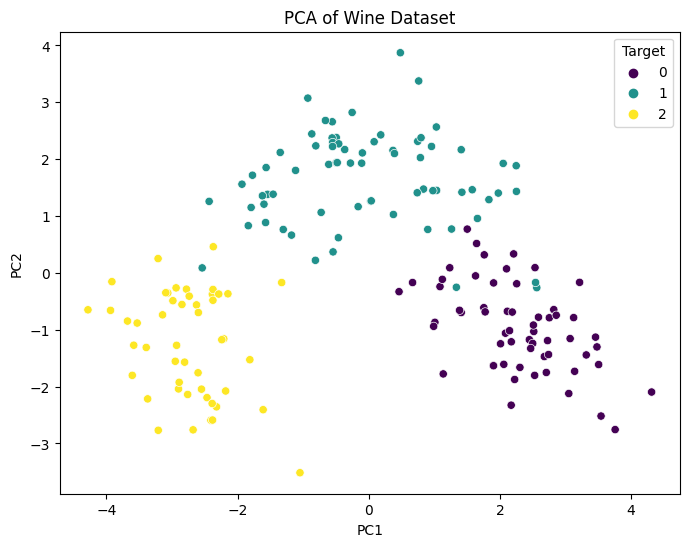

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
wine_pca = pca.fit_transform(wine_scaled)
wine_pca_df = pd.DataFrame(wine_pca, columns=['PC1', 'PC2'])
wine_pca_df['Target'] = wine_df['target']

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=wine_pca_df, palette='viridis')
plt.title('PCA of Wine Dataset')
plt.show()


#### B. t-SNE Visualization

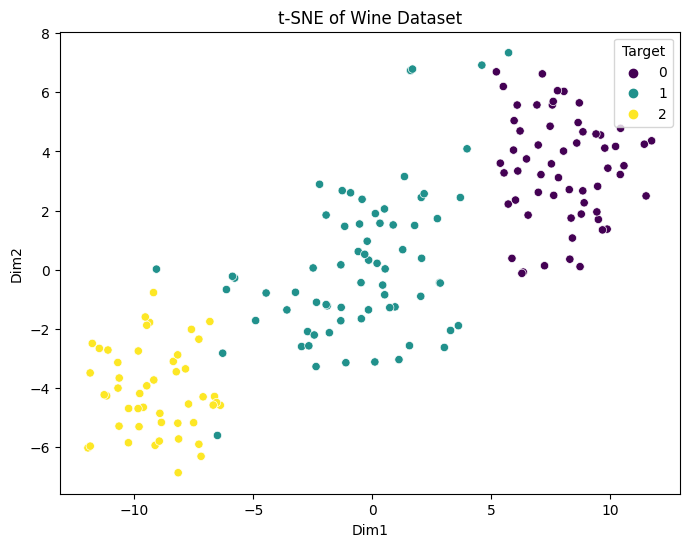

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
wine_tsne = tsne.fit_transform(wine_scaled)
wine_tsne_df = pd.DataFrame(wine_tsne, columns=['Dim1', 'Dim2'])
wine_tsne_df['Target'] = wine_df['target']

plt.figure(figsize=(8,6))
sns.scatterplot(x='Dim1', y='Dim2', hue='Target', data=wine_tsne_df, palette='viridis')
plt.title('t-SNE of Wine Dataset')
plt.show()


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

3\. Association Rule Mining (Apriori) with Groceries Dataset
----------------------------------------------------------------

**Dataset:**  Groceries Dataset

**Objective:** Discover associations between products using the Apriori algorithm.

### 3.1 Data Loading and Preprocessing

In [9]:
import pandas as pd
from tabulate import tabulate

# Load the dataset
file_path = "/kaggle/input/groceries-dataset/Groceries_dataset.csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


### 3.2 Transform Data into Transactions

Since Apriori requires **transactional data** (each row should be a unique transaction with a list of items), we need to **group items by Member\_number & Date**.

In [10]:
# Group by Member_number and Date to create transaction lists
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()

# Display example transactions
print(transactions[:5])  # Show first 5 transactions


[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'], ['whole milk', 'pastry', 'salty snack'], ['canned beer', 'misc. beverages'], ['sausage', 'hygiene articles'], ['soda', 'pickled vegetables']]


### 3.3 Convert Transactions into Apriori-Compatible Format
We need to convert the list of transactions into a one-hot encoded format.

In [11]:
from mlxtend.preprocessing import TransactionEncoder

# Convert transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_array, columns=te.columns_)

# Display first few rows
print(basket.head())


   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False 

### 3.4 Apply Apriori Algorithm

In [12]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.001, use_colnames=True)

# Display frequent itemsets
print("Number of frequent itemsets:", len(frequent_itemsets))
print(tabulate(frequent_itemsets.head(10), headers='keys', tablefmt='fancy_grid'))

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5, num_itemsets=len(frequent_itemsets))

# Select and format the top 10 rules for better readability
top_rules = rules.sort_values(by="lift", ascending=False).head(10)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Convert frozensets to strings for better visualization
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

print("\n📌 Top 10 Association Rules:\n")
print(tabulate(top_rules, headers='keys', tablefmt='fancy_grid'))





Number of frequent itemsets: 750
╒════╤════════════╤══════════════════════════════════════╕
│    │    support │ itemsets                             │
╞════╪════════════╪══════════════════════════════════════╡
│  0 │ 0.00400989 │ frozenset({'Instant food products'}) │
├────┼────────────┼──────────────────────────────────────┤
│  1 │ 0.0213861  │ frozenset({'UHT-milk'})              │
├────┼────────────┼──────────────────────────────────────┤
│  2 │ 0.00147029 │ frozenset({'abrasive cleaner'})      │
├────┼────────────┼──────────────────────────────────────┤
│  3 │ 0.00193811 │ frozenset({'artif. sweetener'})      │
├────┼────────────┼──────────────────────────────────────┤
│  4 │ 0.00808661 │ frozenset({'baking powder'})         │
├────┼────────────┼──────────────────────────────────────┤
│  5 │ 0.00113614 │ frozenset({'bathroom cleaner'})      │
├────┼────────────┼──────────────────────────────────────┤
│  6 │ 0.0339504  │ frozenset({'beef'})                  │
├────┼────────────┼────

### 3.5 Visualizing Results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated an

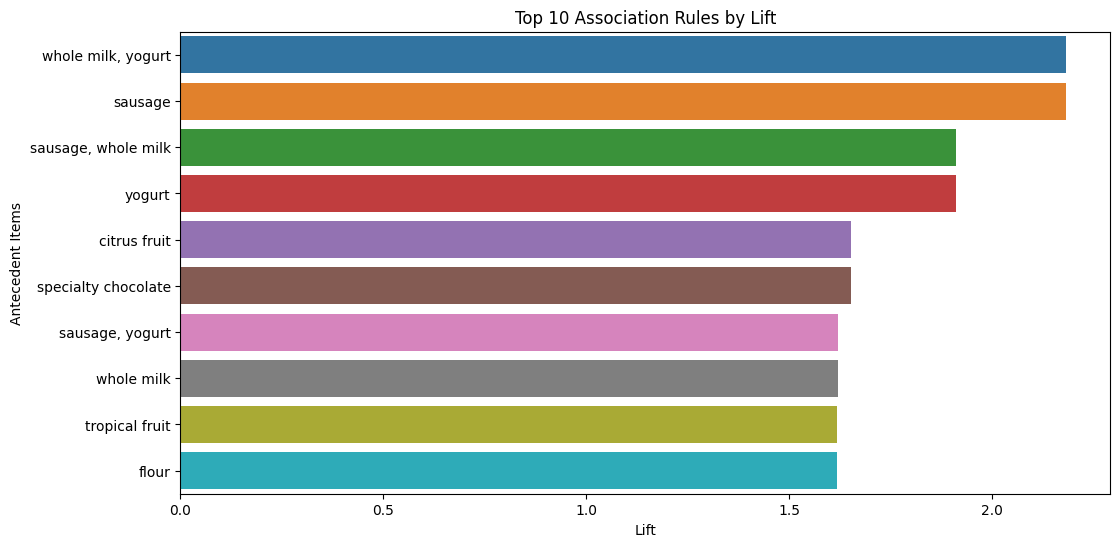

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 rules by lift
plt.figure(figsize=(12, 6))
top_rules = rules.sort_values(by="lift", ascending=False).head(10)
sns.barplot(x=top_rules['lift'], y=top_rules['antecedents'].apply(lambda x: ', '.join(list(x))))
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Antecedent Items')
plt.show()


4\. Conclusion & Insights
-------------------------

### Final Insights:

*   **Clustering:**
    
    *   K-Means, Hierarchical, and DBSCAN offer different perspectives on customer segmentation from the Mall Customers dataset.
        
    *   The elbow method, dendrogram, and silhouette score help determine optimal clusters.
        
*   **Dimensionality Reduction:**
    
    *   PCA and t-SNE provide intuitive 2D visualizations of the Wine dataset, highlighting underlying patterns and separability.
        
*   **Association Rules:**
    
    *   Apriori on the Online Retail data reveals valuable product associations, useful for market basket analysis and promotional strategies.
        

### Key Takeaways:

*   **Preprocessing is Essential:**
    
    *   Careful data cleaning, scaling, and feature engineering are key to obtaining reliable insights.
        
*   **Technique-Specific Insights:**
    
    *   Different clustering algorithms reveal complementary insights about customer behavior.
        
    *   Dimensionality reduction techniques help in visual interpretation, especially when dealing with high-dimensional data.
        
    *   Association rule mining uncovers hidden relationships between products, guiding inventory and marketing decisions.
        

### Future Improvements:

*   Experiment with additional clustering validation metrics (e.g., Davies-Bouldin index).
    
*   Fine-tune parameters for t-SNE and DBSCAN to optimize visualization.
    
*   Explore advanced association rule mining or other market basket analysis techniques.
    

5\. References & Resources
--------------------------

*   [UCI Machine Learning Repository: Online Retail Dataset](https://archive.ics.uci.edu/ml/datasets/online+retail)
    
*   [UCI Wine Dataset](https://archive.ics.uci.edu/ml/datasets/wine)
    
*   mlxtend Documentation
    
*   Scikit-Learn Documentation